In [1]:
# 导入必要的库
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# 下载苹果公司的历史数据
data = yf.download('AAPL', start='2023-01-01', end='2023-07-01')
# 选择收盘价
close_price = data['Close']
# 输出收盘价的前五个数据
print(close_price.head())

[*********************100%***********************]  1 of 1 completed
Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
Name: Close, dtype: float64


In [3]:
# 将收盘价取整
close_price_rounded = close_price.round()
# 输出取整后的前五个数据
print(close_price_rounded.head())

Date
2023-01-03    125.0
2023-01-04    126.0
2023-01-05    125.0
2023-01-06    130.0
2023-01-09    130.0
Name: Close, dtype: float64


In [4]:
# 计算均值
mean = close_price_rounded.mean()
print(f'Mean: {mean}')
# 计算中位数
median = close_price_rounded.median()
print(f'Median: {median}')
# 计算众数
mode = close_price_rounded.mode()
print(f'Mode: {mode[0]}')
# 计算标准差
std = close_price_rounded.std()
print(f'Standard deviation: {std}')
# 计算方差
var = close_price_rounded.var()
print(f'Variance: {var}')
# 计算偏度
skew = close_price_rounded.skew()
print(f'Skewness: {skew}')
# 计算峰度
kurt = close_price_rounded.kurt()
print(f'Kurtosis: {kurt}')

Mean: 160.92741935483872
Median: 161.5
Mode: 165.0
Standard deviation: 16.248163567073867
Variance: 264.00281930238657
Skewness: -0.16775831878833777
Kurtosis: -0.6396185393310341


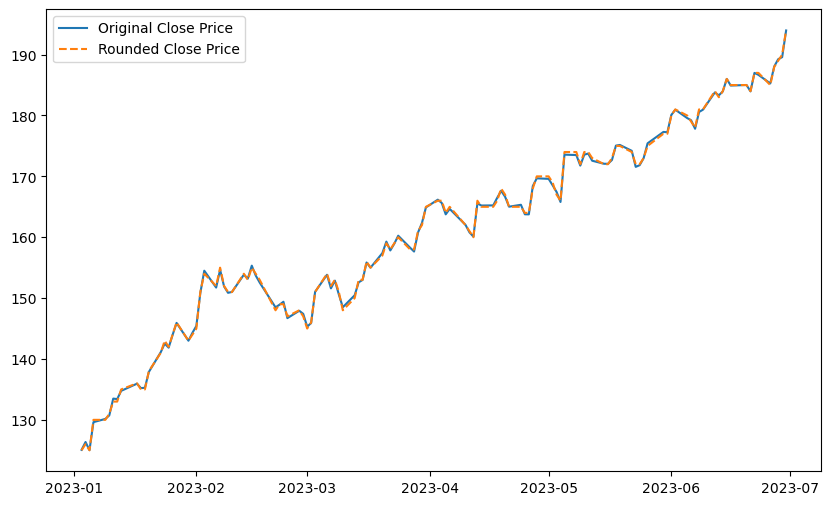

In [5]:
# 创建一个新的figure
plt.figure(figsize=(10,6))
# 绘制原始收盘价
plt.plot(close_price.index, close_price, label='Original Close Price')
# 绘制取整后的收盘价
plt.plot(close_price_rounded.index, close_price_rounded, label='Rounded Close Price', linestyle='--')
# 添加图例
plt.legend()
# 显示图表
plt.show()

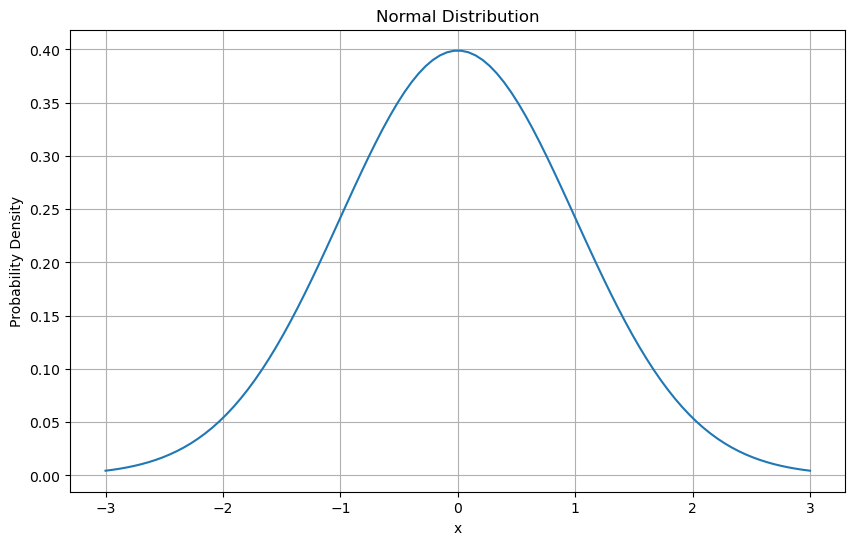

In [6]:
import numpy as np
from scipy.stats import norm
# 创建一个均值为0，标准差为1的正态分布
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

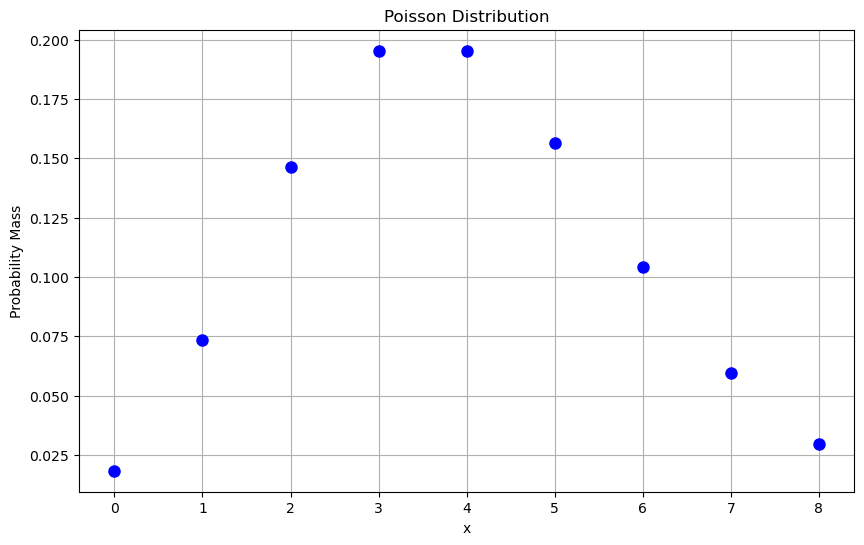

In [7]:
from scipy.stats import poisson
# 创建一个λ为4的泊松分布
lambda_val = 4
x = np.arange(poisson.ppf(0.01, lambda_val), poisson.ppf(0.99, lambda_val))
y = poisson.pmf(x, lambda_val)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'bo', ms=8, label='poisson pmf')
plt.title('Poisson Distribution')
plt.xlabel('x')
plt.ylabel('Probability Mass')
plt.grid(True)
plt.show()

In [8]:
from scipy import stats
# 生成两组随机数据
np.random.seed(0)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0.1, 1, 1000)
# 进行t检验
t_statistic, p_value = stats.ttest_ind(data1, data2)
print(f"t statistic: {t_statistic}")
print(f"p value: {p_value}")

t statistic: -3.631948749571148
p value: 0.0002883783194055379


In [9]:
# 假设我们有以下列联表
# 每一行代表一周中的某一天，每一列代表涨或跌
data = pd.DataFrame({
    'Rise': [10, 9, 8, 15, 20],
    'Fall': [20, 15, 18, 10, 5]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
# 进行χ²检验
chi2, p, _, _ = stats.chi2_contingency(data)
print(f"Chi-squared: {chi2}")
print(f"p value: {p}")

Chi-squared: 18.44184851359899
p value: 0.0010113317624273809


In [10]:
from statsmodels.tsa.ar_model import AutoReg
# 下载苹果公司股票数据
data = yf.download('AAPL', start='2023-01-01', end='2023-07-01')
# 使用收盘价计算收益率
returns = data['Close'].pct_change().dropna()
# 应用自回归模型
model = AutoReg(returns, lags=1)
model_fit = model.fit()
# 输出模型的参数
print('Coefficients: %s' % model_fit.params)
# 预测下一个值
predictions = model_fit.predict(start=len(returns), end=len(returns))
print('Predicted Return: %s' % predictions)

[*********************100%***********************]  1 of 1 completed
Coefficients: const       0.003750
Close.L1   -0.041913
dtype: float64
Predicted Return: 123    0.002782
dtype: float64


C:\Users\HG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\HG\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po